<a href="https://colab.research.google.com/github/dsmunoz34/ML_NLP/blob/main/Semana%204/S4TC1_Tokenizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


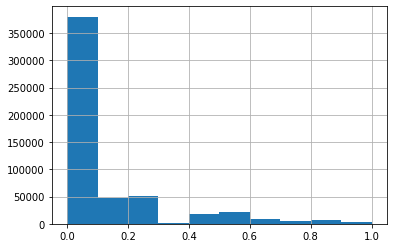

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
len(X)

541462

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [61]:
# Celda 1
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text
vectorizer = CountVectorizer(max_features=100, lowercase=False, preprocessor=preprocess_text)
X_traincv = vectorizer.fit_transform(X_train).toarray()

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_traincv, y_train)

predictions=regressor.predict(vectorizer.transform(X_test))

mse_1=metrics.mean_squared_error(y_test, predictions)
print(mse_1)

0.07643619070155461

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [62]:
# Celda 2
vectorizer_2 = CountVectorizer(max_features=100, lowercase=False, preprocessor=preprocess_text,ngram_range=(3, 3))
X_traincv_2 = vectorizer_2.fit_transform(X_train)

regressor.fit(X_traincv_2, y_train)

predictions_2=regressor.predict(vectorizer_2.transform(X_test))

mse_2=metrics.mean_squared_error(y_test, predictions_2)
print(mse_2)

0.04007676345232372

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3


TF-IDF significa “Term Frequency - Inverse Document Frequency” por sus siglas en inglés o “Frecuencia de términos - Frecuencia inversa de documentos“, traducido al español. Se trata de una técnica estadística que al igual que “Count Vectorizer“ se basa en la frecuencia de una palabra en el conjunto de datos o corpus, pero además proporciona una representación numérica de la importancia de una palabra. 

En este sentido, TF-IDF es mejor que “Count Vectorizer“ porque no sólo se centra en la frecuencia de las palabras presentes en la muestra, sino que también proporciona la importancia de las mismas. De este modo, podemos eliminar las palabras menos importantes para el análisis, lo que hace que la construcción del modelo sea menos compleja. 

Así es como se calcula el TF-IDF:

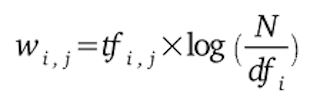

Donde: 

- tfi,j es el número de ocurrencias de i en j 
- dfi es el número de documentos que contienen i 
- N es el número total de documentos 

El TFIDF se basa en la lógica de que tanto las palabras demasiado abundantes en la muestra (corpus) como las demasiado raras no son estadísticamente importantes para encontrar un patrón. El factor logarítmico del TFIDF penaliza matemáticamente las palabras que son demasiado abundantes o demasiado raras en el corpus otorgándoles puntuaciones TFIDF bajas.

No obstante, aunque el TFIDF puede proporcionar una buena comprensión de la importancia de las palabras, al igual que Count Vectorizing, su desventaja es que no proporciona información lingüística sobre las palabras, como el significado real de las mismas, la similitud con otras palabras, etc. 



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5